PROBLEM STATEMENT

In a competitive market like the restaurant industry,understanding the factors that influence business success is crucial for stakeholders. utilizing the yelp dataset, this project aims to investigate the relationship between user engagement(reviews,tips,and check-ins) and business success metric (review, count, ratings)for restaurant

RESEARCH OBJECTIVE

1 - quantify the correlation between user engagement(reviews,tips,checkins) and review count/average star ratings: this will help us determine if restaurant with higher user engagement experience a corresponding increase in reviews and ratings

2 - Analyze the impact of sentiment on review count and average star rating: we will investigate if positive sentimnet in reviews and tips translates to higher star ratings and potentially influences the total number of reviews left.

3 - Time trends in user Engagement: We will explore if consistent user engagement over time is stronger indicator of long-term success compared to sporadic bursts of activity



HYPOTHESIS TESTING

Higher levels of user engagement(more review,tips and check-ins) correlate with higher review counts and ratings for restaurant

positive sentiment expressed in reviews and tips contributes to higher overall ratings and review counts for restaurants

consistent engagement over time is positively associated with sustained business success for restaurants

Importing libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import psycopg2
import folium   # for maps
import pandas as pd
from geopy.geocoders import Nominatim # for latitude and longitude
from matplotlib.colors import LinearSegmentedColormap  # color map
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

DATABASE CONNECTION

In [10]:
conn = psycopg2.connect(
   
)

cur = conn.cursor()

In [11]:
tables = pd.read_sql_query("SELECT table_name FROM information_schema.tables WHERE table_schema = 'public'",conn)

In [12]:
tables

,table_name
0,business
1,checkin
2,review
3,user
4,tip


In [14]:
#explore what type of data is available in the tables

for table in tables['table_name']:
    display(pd.read_sql_query(f"select * from {table} limit 5",conn))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user
0,postgres


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


DATA ANALYSIS

In [15]:
pd.read_sql_query("select count(*) from business", conn)

,count
0,150346


In [18]:
pd.read_sql_query("""select business_id from business where lower(categories) like '%restaurant%' and is_open = 1""",conn)

,business_id
0,MTSW4McQd7CbVtyjqoe9mw
1,CF33F8-E6oudUQ46HnavjQ
2,bBDDEgkFA1Otx9Lfe7BZUQ
3,eEOYSgkmpB90uNA7lDOMRA
4,il_Ro8jwPlHresjw9EGmBg
...,...
34999,wVxXRFf10zTTAs11nr4xeA
35000,sf_oQ62L8UEnOOLf00nNGA
35001,w_4xUt-1AyY2ZwKtnjW0Xg
35002,l9eLGG9ZKpLJzboZq-9LRQ


observation - 
35k restaurants are open

In [45]:
business_id = pd.read_sql_query("""select business_id,review_count from business where lower(categories) like '%restaurant%' and is_open = 1""",conn)

In [46]:
# what is the descriptive stats for review count and star rating for business?
# avg, min , max,median

# Retrieve review counts
review_counts = pd.read_sql_query("""
SELECT review_count
FROM business
WHERE business_id IN %s
""", conn, params=(tuple(business_id['business_id']),))

# Calculate descriptive statistics
avg_review_count = review_counts['review_count'].mean()
min_review_count = review_counts['review_count'].min()
max_review_count = review_counts['review_count'].max()
median_review_count = review_counts['review_count'].median()

# Display results
print(f"Average Review Count: {avg_review_count}")
print(f"Minimum Review Count: {min_review_count}")
print(f"Maximum Review Count: {max_review_count}")
print(f"Median Review Count: {median_review_count}")


Average Review Count: 104.09778882413438
Minimum Review Count: 5
Maximum Review Count: 7568
Median Review Count: 40.0


In [47]:
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [48]:
business_id = remove_outliers(business_id, 'review_count')

In [49]:
business_id.shape

(31537, 2)

In [50]:
# WHICH restaurants have the highest number of reviews?

pd.read_sql_query(f"""select name, sum(review_count) as review_count,avg(stars) as avg_rating
from business
where business_id in {tuple(business_id['business_id'])}
group by name
order by review_count desc
limit 10""",conn)

,name,review_count,avg_rating
0,McDonald's,16490.0,1.868702
1,Chipotle Mexican Grill,9071.0,2.381757
2,Taco Bell,8017.0,2.141813
3,Chick-fil-A,7687.0,3.377419
4,First Watch,6761.0,3.875000
5,Panera Bread,6613.0,2.661905
6,Buffalo Wild Wings,6483.0,2.344828
7,Domino's Pizza,6091.0,2.290210
8,Wendy's,5930.0,2.030159
9,Chili's,5744.0,2.514706


In [51]:
# WHICH restaurants have the highest number of ratings?

pd.read_sql_query(f"""select name, sum(review_count) as review_count,avg(stars) as avg_rating
from business
where business_id in {tuple(business_id['business_id'])}
group by name
order by avg_rating desc
limit 10""",conn)

,name,review_count,avg_rating
0,Taqueria La Coyota,7.0,5.0
1,Kincaid's Meat Market,68.0,5.0
2,Hole in One Donuts - Brandon,85.0,5.0
3,Top Out Cafe,21.0,5.0
4,African Naturals,9.0,5.0
5,Uptown Eats,57.0,5.0
6,The Catio Cat Lounge,10.0,5.0
7,Mazzanti's Market,74.0,5.0
8,Mommy Telly's Famous BBQ,14.0,5.0
9,McNally's Tavern - Mayfair,9.0,5.0


Observation - from the above analysis we got to know that only reviews or rating counts does not give us the insights of whether restaurant is succesfull or not

WE WILL CREATE A SUCCESS SCORE BASED ON AVG RATING AND REVIEW COUNT

In [64]:
#Do restaurants with higher engagement tend to have higher ratings?

pd.read_sql_query("""SELECT business_id,
       SUM(LENGTH(date) - LENGTH(REPLACE(date,',',''))+1) AS checkin_count
FROM checkin
GROUP BY business_id
""",conn)

,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--_9CAxgfXZmoFdNIRrhHA,136
2,--_lZuj_WCGnDG6n0emlRg,30
3,--0iUa4sNDFiZFrAdIWhZQ,10
4,--30_8IhuyMHbSOcNWd6DQ,2
...,...,...
131925,ZZYV8hA0Ty93TeDKW4_bBw,14
131926,ZZyVnWiMjySRcFOTmpMS3w,11
131927,zzyx5x0Z7xXWWvWnZFuxlQ,1
131928,ZzzJ2jAPFJQGehBKcrZCYQ,49


In [65]:
pd.read_sql_query("""SELECT business_id, count(*) as tip_count
                     FROM tip      
                     GROUP BY business_id
                    """,conn)

,business_id,tip_count
0,V9ajbgVgiZfR0mD-ZRerDw,6
1,xyt8FfA4idSSMLIRQsDPGg,9
2,JbyHeQe-Ifn3FPpp0LATwA,4
3,DuPI1X-jU80Cyp_L7k46Mg,4
4,zXm3SIx6L0WEXJNVzKUq0Q,1
...,...,...
106188,PQ7sOybwQrnXTmHRsC9X7w,3
106189,z77ABD_iz8lAGOJM5UPljg,1
106190,_dDW5rc7MKCOzhRewe3Kfg,4
106191,f1y5rQCSyQ0z7OKRexWzXQ,2


In [71]:
pd.read_sql_query(f"""SELECT 
    total.avg_rating AS rating,
    AVG(total.review_count) AS avg_review_count,
    AVG(total.checkin_count) AS avg_checkin_count,
    AVG(total.tip_count) AS avg_tip_count
    FROM 
    (SELECT
        b.business_id,
        SUM(b.review_count) AS review_count,
        AVG(b.stars) AS avg_rating,
        SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) AS checkin_count,
        SUM(tip.tip_count) AS tip_count
    FROM 
        business b
    LEFT JOIN 
        checkin cc ON b.business_id = cc.business_id
    LEFT JOIN 
        (SELECT business_id, COUNT(business_id) AS tip_count FROM tip
        GROUP BY business_id ORDER BY tip_count) AS tip ON b.business_id = tip.business_id
    WHERE b.business_id IN {tuple(business_id['business_id'])}
    GROUP BY 
        b.business_id) as total

    GROUP BY total.avg_rating
    ORDER BY rating ASC;
""",conn)


,rating,avg_review_count,avg_checkin_count,avg_tip_count
0,1.0,14.365079,17.518072,2.781513
1,1.5,24.358459,34.480969,3.884654
2,2.0,27.759629,52.386515,4.581058
3,2.5,36.631037,79.349429,6.325225
4,3.0,48.054998,105.970405,8.301950
5,3.5,63.730125,125.781702,10.320786
6,4.0,73.136954,127.139075,11.329362
7,4.5,65.282554,86.177605,8.995201
8,5.0,31.127979,27.545113,4.269082


In [72]:
review_count_df = pd.read_sql_query(f"""SELECT 
    total.avg_rating AS rating,
    AVG(total.review_count) AS avg_review_count,
    AVG(total.checkin_count) AS avg_checkin_count,
    AVG(total.tip_count) AS avg_tip_count
    FROM 
    (SELECT
        b.business_id,
        SUM(b.review_count) AS review_count,
        AVG(b.stars) AS avg_rating,
        SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) AS checkin_count,
        SUM(tip.tip_count) AS tip_count
    FROM 
        business b
    LEFT JOIN 
        checkin cc ON b.business_id = cc.business_id
    LEFT JOIN 
        (SELECT business_id, COUNT(business_id) AS tip_count FROM tip
        GROUP BY business_id ORDER BY tip_count) AS tip ON b.business_id = tip.business_id
    WHERE b.business_id IN {tuple(business_id['business_id'])}
    GROUP BY 
        b.business_id) as total

    GROUP BY total.avg_rating
    ORDER BY rating ASC;
""",conn)


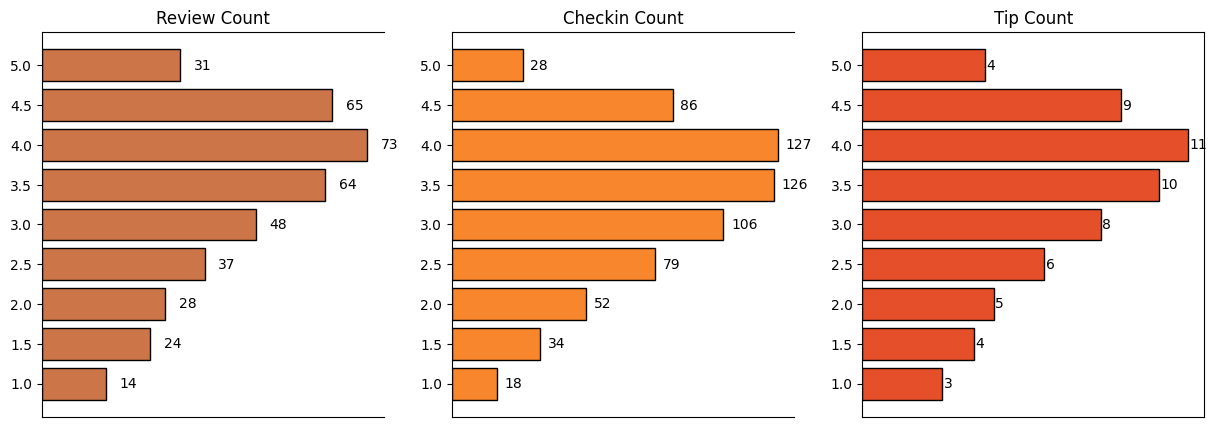

In [74]:
plt.figure(figsize=(15,5))
plt.title('AVG Engagement based on Rating\n\n')
plt.yticks([])
plt.xticks([])
plt.subplot(1,3,1)
plt.title("Review Count")
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_review_count'], edgecolor = 'k', color = '#CB7548')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_review_count']):
    plt.text(value+3,i, str(round(value)), color='black', va="center")

plt.xticks([])
plt.subplot(1,3,2)
plt.title("Checkin Count")
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_checkin_count'], edgecolor = 'k', color = '#F8862C')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_checkin_count']):
    plt.text(value+3, i, str(round(value)), color='black', va='center')

plt.xticks([])
plt.subplot(1,3,3)
plt.title("Tip Count")
plt.barh(review_count_df['rating'].astype("str"), review_count_df['avg_tip_count'], edgecolor = 'k',color="#E54F29")
for i, value in enumerate(review_count_df["avg_tip_count"]):
    plt.text(value+0.05, i, str(round(value)), color='black', va="center")
plt.xticks([])
plt.show()

In [94]:
## is there a correlation between number of reviews, tips and check-ins for a business?


engagement_df = pd.read_sql_query(f"""SELECT
        b.business_id,
        SUM(b.review_count) AS review_count,
        AVG(b.stars) AS avg_rating,
        SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) AS checkin_count,
        SUM(tip.tip_count) AS tip_count,
        (CASE WHEN AVG(b.stars) >= 3.5 Then 'High-Rated' Else 'Low-Rated' END) as category
    FROM 
        business b
    LEFT JOIN 
        checkin cc ON b.business_id = cc.business_id
    LEFT JOIN 
        (SELECT business_id, COUNT(business_id) AS tip_count FROM tip
        GROUP BY business_id ORDER BY tip_count) AS tip ON b.business_id = tip.business_id
    WHERE b.business_id IN {tuple(business_id['business_id'])}
    GROUP BY 
        b.business_id

""",conn).dropna()



In [85]:
engagement_df[['review_count','checkin_count','tip_count']].corr()

,review_count,checkin_count,tip_count
review_count,1.000000,0.626884,0.766321
checkin_count,0.626884,1.000000,0.772088
tip_count,0.766321,0.772088,1.000000


<Axes: >

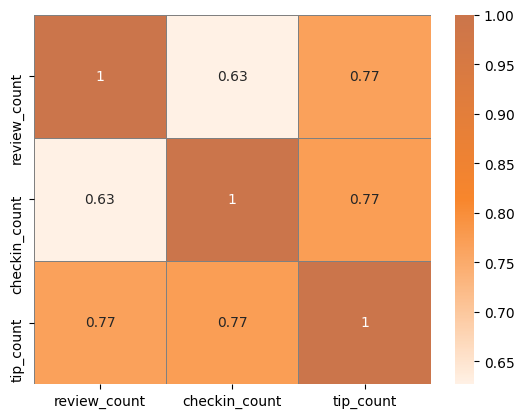

In [87]:
colors = ['#FFF1E5',"#F8862C", "#CB754B"]
custom_cmap = LinearSegmentedColormap.from_list("mycmap", colors)
sns.heatmap(engagement_df[['review_count', 'checkin_count', 'tip_count']].corr(), cmap = custom_cmap, annot = True, linewidths=0.5, linecolor= 'gray')

In [91]:
# is there a difference in the user engagement (reviews,tips, and check-ins) between high-rated and low-rated business?

pd.read_sql_query(f"""SELECT
        b.business_id,
        SUM(b.review_count) AS review_count,
        AVG(b.stars) AS avg_rating,
        SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) AS checkin_count,
        SUM(tip.tip_count) AS tip_count,
        (CASE WHEN AVG(b.stars) >= 3.5 Then 'High-Rated' Else 'Low-Rated' END) as category
    FROM 
        business b
    LEFT JOIN 
        checkin cc ON b.business_id = cc.business_id
    LEFT JOIN 
        (SELECT business_id, COUNT(business_id) AS tip_count FROM tip
        GROUP BY business_id ORDER BY tip_count) AS tip ON b.business_id = tip.business_id
    WHERE b.business_id IN {tuple(business_id['business_id'])}
    GROUP BY 
        b.business_id

""",conn).dropna()


,business_id,review_count,avg_rating,checkin_count,tip_count,category
0,---kPU91CF4Lq2-WlRu9Lw,24.0,4.5,11.0,4.0,High-Rated
1,--0iUa4sNDFiZFrAdIWhZQ,14.0,3.0,10.0,6.0,Low-Rated
2,--epgcb7xHGuJ-4PUeSLAw,34.0,3.0,118.0,6.0,Low-Rated
4,--lqIzK-ZVTtgwiQM63XgQ,15.0,2.0,21.0,2.0,Low-Rated
5,-_0w82rV27l51N3ABkCI0A,126.0,4.5,265.0,26.0,High-Rated
...,...,...,...,...,...,...
31530,zZrDoiQIUmiVkifJx0h_KA,8.0,4.5,20.0,2.0,High-Rated
31532,ZzvFtb6K0toNxjfdt8TUkA,18.0,4.0,30.0,4.0,High-Rated
31533,zZwnm2htQGTBJkpGy2hemw,10.0,2.5,11.0,1.0,Low-Rated
31535,ZZyVnWiMjySRcFOTmpMS3w,19.0,3.0,11.0,4.0,Low-Rated


In [96]:

engagement_df.groupby("category")[['review_count','tip_count','checkin_count']].mean()

,review_count,tip_count,checkin_count
category,,,
High-Rated,72.291062,10.162766,122.066641
Low-Rated,42.123420,6.541689,88.880828


In [109]:
# function to calculate the success score based on the avg rating and total review count

def calculate_success_metric(df):
    success_score = []
    for index, row in df.iterrows():
        score = row['avg_rating'] * np.log(row['review_count']+1)
        success_score.append(score)
    return success_score    

In [110]:
# how do the success metric (review_count or avg_rating) of restaurant vary across different states and cities?

city_df = pd.read_sql_query(f"""select city, state, latitude, longitude, AVG(stars) as avg_rating, SUM(review_count) as review_count,
count(*) as restaurant_count
from business
WHERE business_id IN {tuple(business_id['business_id'])}
group by state, city ,latitude, longitude
order by review_count desc
limit 10 """,conn)

In [111]:
city_df['success_score'] = calculate_success_metric(city_df)

In [112]:
city_df

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count,success_score
0,Philadelphia,PA,39.953159,-75.159098,4.000000,541.0,6,25.181064
1,Nashville,TN,36.163685,-86.782598,4.000000,517.0,3,24.999901
2,Carmel,IN,39.978599,-86.128981,4.166667,503.0,3,25.927401
3,Sparks,NV,39.541452,-119.716242,3.000000,452.0,4,18.347676
4,Hendersonville,TN,36.302820,-86.619056,4.375000,431.0,4,26.549362
5,Nashville,TN,36.170064,-86.665561,3.625000,424.0,4,21.938823
6,Nashville,TN,36.138603,-86.800358,4.000000,417.0,2,24.141926
7,Philadelphia,PA,39.958359,-75.195393,4.250000,416.0,6,25.640616
8,Indianapolis,IN,39.858230,-85.978565,4.250000,411.0,2,25.589349
9,Philadelphia,PA,39.949756,-75.148062,3.583333,379.0,12,21.285614


In [117]:
# Create a base map
m = folium.Map(location=[city_df ['latitude'].mean(), city_df['longitude'].mean()], zoom_start=4)

# Define a color scale
color_scale = folium.LinearColormap(colors=['green', 'yellow', '#E54F29'],
                                    vmin=city_df['success_score'].min(),
                                    vmax=city_df['success_score'].max())

for index, row in city_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color_scale(row['success_score']),
        fill=True,
        fill_color=color_scale(row['success_score']),
        fill_opacity=0.7,
        popup=f"Success Score: {row['success_score']}"
    ).add_to(m)

# Add color scale to the map
m.add_child(color_scale)

if we start restaurant in this cities there are chances of getting high success rates

In [120]:
##Are there any patterns in user engagement over time for successful business compared to less successful ones?
#Are there any seasonal trends in the user engagement for restaurant
high_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count FROM
(SELECT to_char(date::date, 'MM-YYYY') AS month_year, COUNT(*) AS review_count
FROM review
WHERE business_id IN {tuple(business_id['business_id'])} AND stars >= 3.5
GROUP BY month_year
ORDER BY month_year) AS review
JOIN
(SELECT to_char(tip.date::date, 'MM-YYYY') AS month_year, COUNT(*) AS tip_count
FROM tip
JOIN business AS b ON tip.business_id = b.business_id
WHERE tip.business_id IN {tuple(business_id['business_id'])} AND b.stars >= 3.5
GROUP BY month_year
ORDER BY month_year) AS tip
ON review.month_year = tip.month_year;
""", conn)

low_rated_engagement = pd.read_sql_query(f""" 
SELECT review.month_year, review.review_count, tip.tip_count FROM
(SELECT to_char(date::date, 'MM-YYYY') AS month_year, COUNT(*) AS review_count
FROM review
WHERE business_id IN {tuple(business_id['business_id'])} AND stars < 3.5
GROUP BY month_year
ORDER BY month_year) AS review
JOIN
(SELECT to_char(tip.date::date, 'MM-YYYY') AS month_year, COUNT(*) AS tip_count
FROM tip
JOIN business AS b ON tip.business_id = b.business_id
WHERE tip.business_id IN {tuple(business_id['business_id'])} AND b.stars < 3.5
GROUP BY month_year
ORDER BY month_year) AS tip
ON review.month_year = tip.month_year;
""", conn)



In [122]:
low_rated_engagement

,month_year,review_count,tip_count
0,01-2012,1748,538
1,01-2018,6328,380
2,01-2021,5605,178
3,02-2011,1080,335
4,02-2012,1613,599
...,...,...,...
149,11-2014,3417,351
150,11-2019,7446,274
151,11-2020,5077,154
152,12-2015,4662,496


In [121]:
high_rated_engagement

,month_year,review_count,tip_count
0,01-2012,3086,1321
1,01-2018,12091,1404
2,01-2021,12575,1061
3,02-2011,1929,682
4,02-2017,9607,1677
...,...,...,...
149,07-2018,15259,1484
150,07-2021,15165,1113
151,08-2015,9002,1618
152,08-2019,16937,1594


In [125]:
time_rating = pd.read_sql_query(f"""SELECT to_char(date::date, 'MM-YYYY') AS month_year, AVG(stars) as avg_rating
FROM review
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY month_year
ORDER BY month_year
;""",conn)

In [126]:
time_rating

,month_year,avg_rating
0,01-2006,4.000000
1,01-2007,3.897436
2,01-2008,3.603960
3,01-2009,3.690661
4,01-2010,3.724194
...,...,...
198,12-2017,3.613415
199,12-2018,3.608687
200,12-2019,3.665246
201,12-2020,3.833701


In [127]:
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year',inplace = True)
time_rating = time_rating[time_rating['month_year']>'2017']

high_rated_engagement ['month_year'] = pd.to_datetime(high_rated_engagement ['month_year'])
high_rated_engagement.sort_values('month_year',inplace = True)
high_rated_engagement = high_rated_engagement [high_rated_engagement['month_year']>'2017']

low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])
low_rated_engagement.sort_values('month_year',inplace = True)
low_rated_engagement = low_rated_engagement [low_rated_engagement['month_year']>'2017']

In [128]:
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

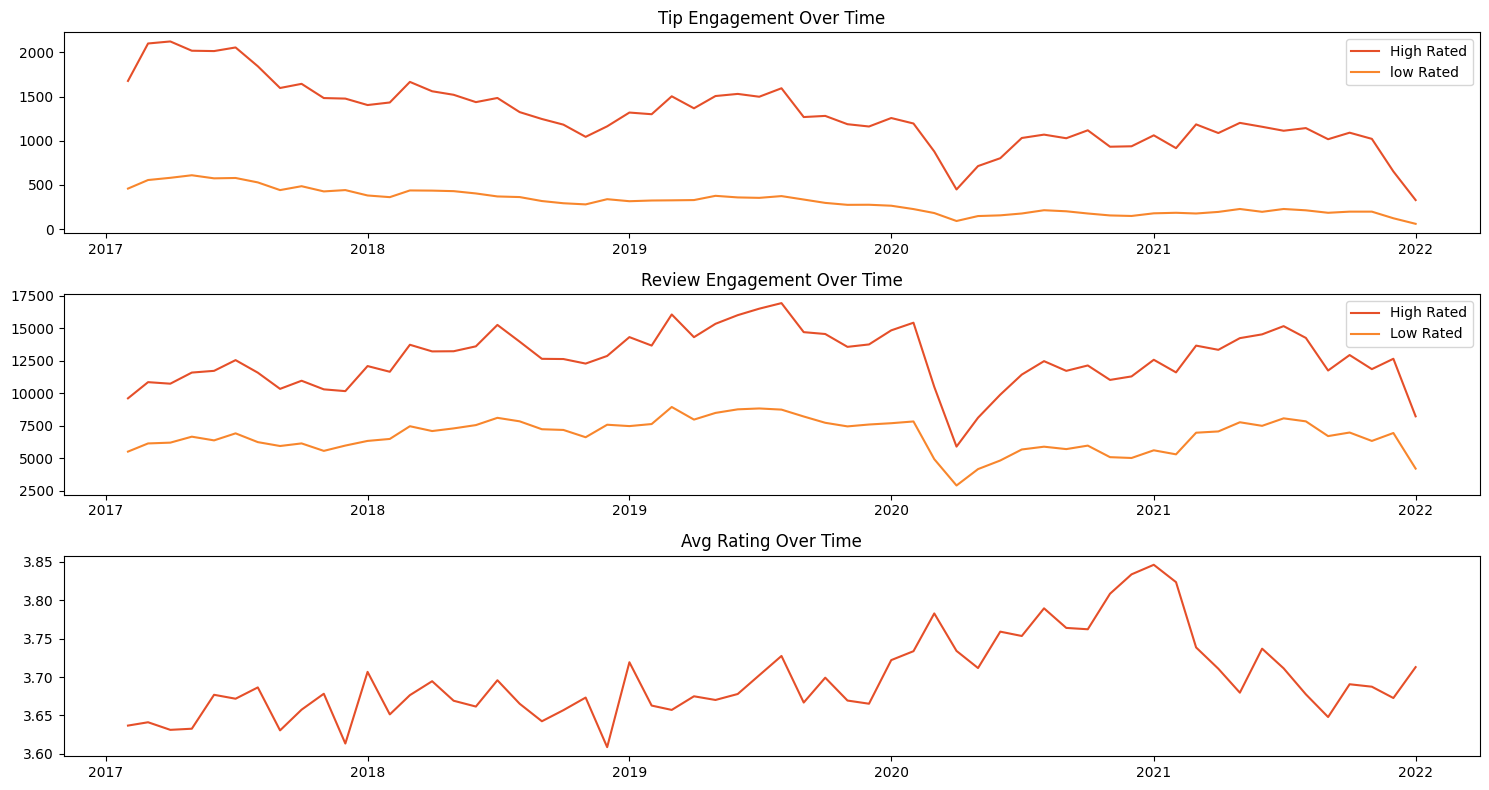

In [129]:
plt.figure(figsize = (15,8))
plt.subplot(3,1,1)
plt.title("Tip Engagement Over Time")
plt.plot(high_rated_engagement ['month_year'],high_rated_engagement['tip_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['tip_count'], label = 'low Rated',color = '#F8862C')
plt. legend()
plt.subplot(3,1,2)
plt.title('Review Engagement Over Time')
plt.plot(high_rated_engagement['month_year'],high_rated_engagement['review_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['review_count'], label = 'Low Rated', color = '#F8862C')
plt. legend()
plt.subplot(3,1,3)
plt.title('Avg Rating Over Time')
plt.plot(time_rating['month_year'],time_rating['avg_rating'], color = '#E54F29')
plt.tight_layout()
plt.show()

In [136]:
# How does the sentiment of reviews and tips (useful, funny, cool) correlate with the success metrics of restaurants?

sentiment_df = pd.read_sql_query(f"""SELECT b.business_id, AVG(b.stars) as avg_rating, SUM(b.review_count) as review_count,
SUM(s.useful_count) as useful_count,
SUM(s.funny_count) as funny_count,
SUM(s.cool_count) as cool_count
FROM
(SELECT business_id,
SUM(useful) as useful_count,
SUM(funny) as funny_count,
SUM(cool) as cool_count
FROM
    review
GROUP BY business_id) as s
JOIN business as b on b.business_id = s.business_id

WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY b.business_id
ORDER BY review_count""",conn)


sentiment_df = remove_outliers(sentiment_df, 'review_count')
sentiment_df = remove_outliers(sentiment_df, 'useful_count')
sentiment_df = remove_outliers(sentiment_df, 'funny_count')
sentiment_df = remove_outliers(sentiment_df,'cool_count')

In [137]:
sentiment_df['success_score'] = calculate_success_metric(sentiment_df)

<Axes: >

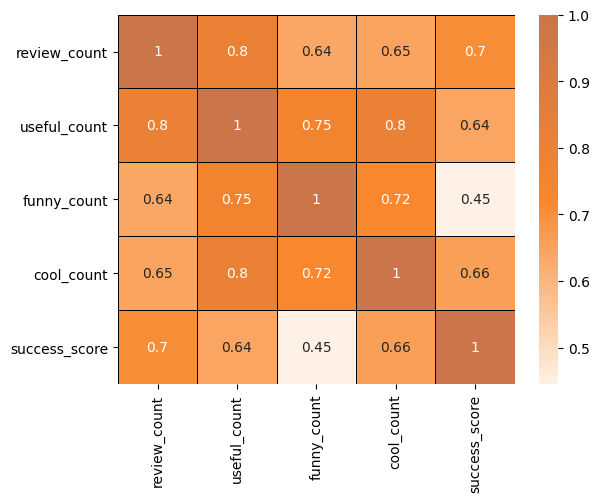

In [138]:
sns.heatmap(sentiment_df.iloc[:,2:].corr(), cmap=custom_cmap, annot=True, linewidths=0.5, linecolor='black')

In [145]:
review_engagement = pd.read_sql_query("""SELECT
    EXTRACT(HOUR FROM date::timestamp) AS hour,
    COUNT(*) AS review_count
FROM
    review
GROUP BY
    hour
ORDER BY
    hour;


""", conn)

In [146]:
tip_engagement = pd.read_sql_query("""SELECT
    EXTRACT(HOUR FROM date::timestamp) AS hour,
    COUNT(*) AS tip_count
FROM
    tip
GROUP BY
    hour
ORDER BY
    hour;

""", conn)